# Project:

# Face Mask Detection:

During pandemic COVID-19, WHO has made wearing masks compulsory to protect against this deadly virus.In support  of the ongoing fight against this infectious disease, we are motivated to generate new insights, by providing information about the people who don’t wear facemasks, using deep learning techniques

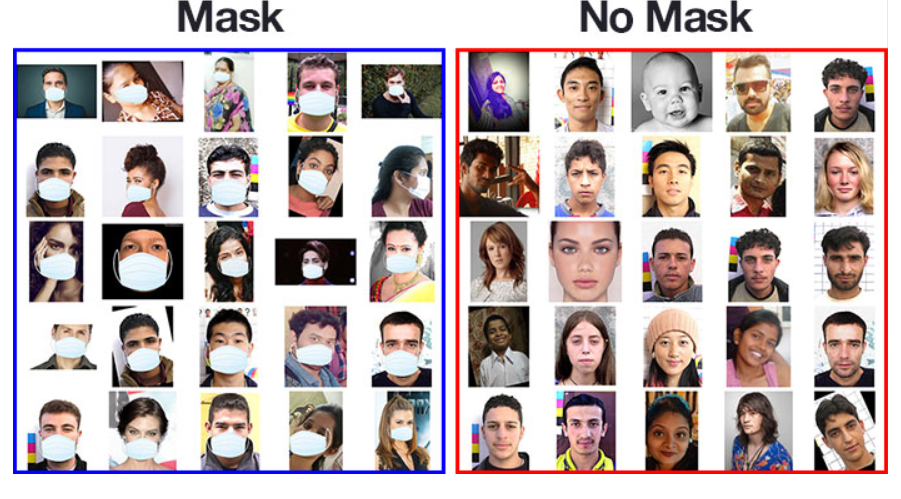

# Import all libraries:

In [1]:
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model

from keras.preprocessing import image
import cv2
import datetime



*   Conv2D Layer
> * **The filter** parameter means the number of this layer's output filters 
> *   **The kernal_size** parameter is commonly used 3*3
> *   **The activation** parameter refers to the type of activation function
> *   **The input_shape** parameter has pixel high and pixel wide and have the 3 color channels: RGB
*   MaxPool2D Layer
> To pool and reduce the dimensionlaity of the data
*   Flatten Layer
> * flatten is used to flatten the input to a 1D vector then passed to dense
*   Dense Layer (The output layer)
> * **The units** parameter means that it has 2 nodes one for with and one for without because we want a binary output 
> *   **The activation** parameter we use the softmax activation function on our output so that the output for each sample is a probability distribution over the outputs of with and without mask

# Build model

This convolution network consists of two pairs of Conv and MaxPool layers to extract features from the dataset. Which is then followed by a Flatten and Dropout layer to convert the data in 1D and ensure overfitting.

And then two Dense layers for classification.



In [2]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Image Data Augmentation:

In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        'test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


# Train the model:

In [7]:
model_saved=model.fit_generator(training_set,epochs=10,validation_data=test_set)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
83/83 [==============================] - 60s 719ms/step - loss: 0.2993 - accuracy: 0.8639 - val_loss: 0.2877 - val_accuracy: 0.8814
Epoch 2/10
83/83 [==============================] - 53s 645ms/step - loss: 0.1647 - accuracy: 0.9445 - val_loss: 0.1280 - val_accuracy: 0.9691
Epoch 3/10
83/83 [==============================] - 54s 645ms/step - loss: 0.1105 - accuracy: 0.9635 - val_loss: 0.0943 - val_accuracy: 0.9691
Epoch 4/10
83/83 [==============================] - 59s 708ms/step - loss: 0.1122 - accuracy: 0.9627 - val_loss: 0.0866 - val_accuracy: 0.9845
Epoch 5/10
83/83 [==============================] - 56s 671ms/step - loss: 0.0912 - accuracy: 0.9688 - val_loss: 0.1118 - val_accuracy: 0.9639
Epoch 6/10
83/83 [==============================] - 54s 655ms/step - loss: 0.0787 - accuracy: 0.9696 - val_loss: 0.0600 - val_accuracy: 0.9794
Epoch 7/10
83/83 [==============================] - 54s 650ms/step

# Plot Accuracy and Loss

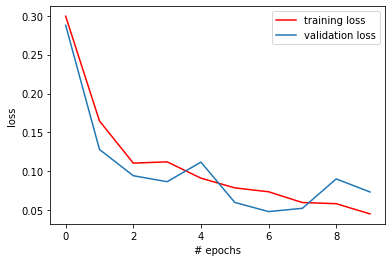

In [9]:
from matplotlib import pyplot as plt

plt.plot(model_saved.history['loss'],'r',label='training loss')
plt.plot(model_saved.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

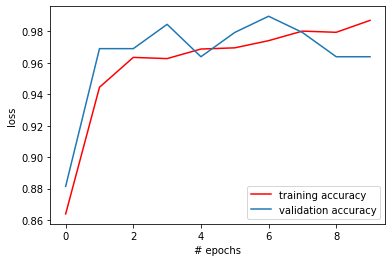

In [10]:
plt.plot(model_saved.history['accuracy'],'r',label='training accuracy')
plt.plot(model_saved.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Detect with images

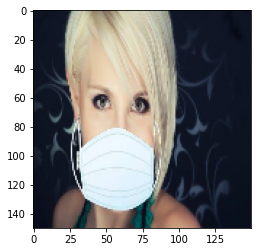

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.
[[0]]
Probability:[[0.]]
WITH MASK


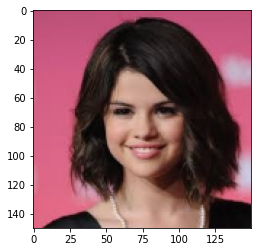

[[1]]
Probability:[[1.]]
WITHOUT MASK


In [12]:
def predict_mask(path):
    im = cv2.imread(path)
    im_resized = cv2.resize(im, (150, 150), interpolation=cv2.INTER_LINEAR)
 
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()
     
    img_pred = image.load_img(path,target_size=(150,150))
    img_pred = image.img_to_array(img_pred)
    img = np.expand_dims(img_pred,axis=0)
    result = model.predict_classes(img)
    prob = model.predict_proba(img)
    print(result)
    print('Probability:{}'.format(prob))
    if result[0]==0:
        prediction ="WITH MASK"
    else:
        prediction ="WITHOUT MASK"
 
    print(prediction)
 
 
# Function calling 
 
predict_mask('C:/Users/NEXUS-PC/Desktop/Project/Dataset/test/with_mask/5-with-mask.jpg')
predict_mask('C:/Users/NEXUS-PC/Desktop/Project/Dataset/test/without_mask/11.jpg')

# IMPLEMENTING LIVE DETECTION OF FACE MASK

In [ ]:


mymodel=load_model('mymodel.h5')

cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while cap.isOpened():
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        test_image=image.load_img('temp.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=mymodel.predict_classes(test_image)[0][0]
        if pred==1:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(img,'NO MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,'MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
        datet=str(datetime.datetime.now())
        cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
          
    cv2.imshow('img',img)
    
    if cv2.waitKey(1)==ord('q'):
        break

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
